In [3]:
import sys
import json
sys.path.append("..")

In [63]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage
from src.tacogfn.utils import molecules, misc

In [37]:
path = '../misc/generated_molecules/20240117_2024_01_16_run_pharmaco_frag_alpha_100_per_pocket.json'

with open(path) as f:
    data = json.load(f)

In [65]:
crossdock_fps = misc.get_reference_fps()

In [39]:
from rdkit import DataStructs

def compute_novelty(mol, ref_smiles, ref_fps):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
    s = DataStructs.BulkTanimotoSimilarity(fp, ref_fps)
    return np.max(s), ref_smiles[np.argmax(s)]

In [51]:
data.keys()

dict_keys(['4p6p_A', '3ej8_A', '4rv4_A', '5liu_X', '1r1h_A', '2zen_A', '4tos_A', '4pxz_A', '2gns_A', '5tjn_A', '4f1m_A', '2pqw_A', '4rn0_B', '5l1v_A', '2e6d_A', '4qlk_A', '3jyh_A', '4ja8_B', '4zfa_A', '4tqr_A', '3kc1_A', '1djy_A', '1e8h_A', '4d7o_A', '2azy_A', '4keu_A', '4xli_B', '3tym_A', '3l3n_A', '1coy_A', '1umd_B', '3chc_B', '2jjg_A', '3o96_A', '2hcj_B', '3gs6_A', '4h3c_A', '1afs_A', '2pc8_A', '4g3d_B', '1h36_A', '14gs_A', '5bur_A', '4kcq_A', '2e24_A', '1phk_A', '5b08_A', '2f2c_B', '1jn2_P', '3g51_A', '2z3h_A', '5aeh_A', '2rhy_A', '5d7n_D', '4iiy_A', '3li4_A', '4q8b_B', '1gg5_A', '4azf_A', '5w2g_A', '1dxo_C', '1ai4_A', '4rlu_A', '3nfb_A', '2cy0_A', '3pnm_A', '4bel_A', '4aua_A', '2v3r_A', '4z2g_A', '5q0k_A', '4m7t_A', '3u9f_C', '5mgl_A', '1a2g_A', '3v4t_A', '1l3l_A', '1h0i_A', '3hy9_B', '4u5s_A', '3b6h_A', '4gvd_A', '3dzh_A', '4lfu_A', '4aaw_A', '3u5y_B', '4iwq_A', '2rma_A', '5mma_A', '3pdh_A', '3daf_A', '1k9t_A', '3w83_B', '1fmc_B', '5ngz_A', '5i0b_A', '3af2_A', '1rs9_A', '1d7j_A',

In [58]:
smiles = data['2zen_A']['smiles']
mols = [Chem.MolFromSmiles(s) for s in smiles]

In [59]:
1 - np.mean(molecules.compute_diversity(mols))

0.7475516244606264

In [62]:
res = [compute_novelty(mol, crossdock_smiles, crossdock_fps) for mol in mols]
print(np.mean([r[0] for r in res])) 

0.3147098306493703


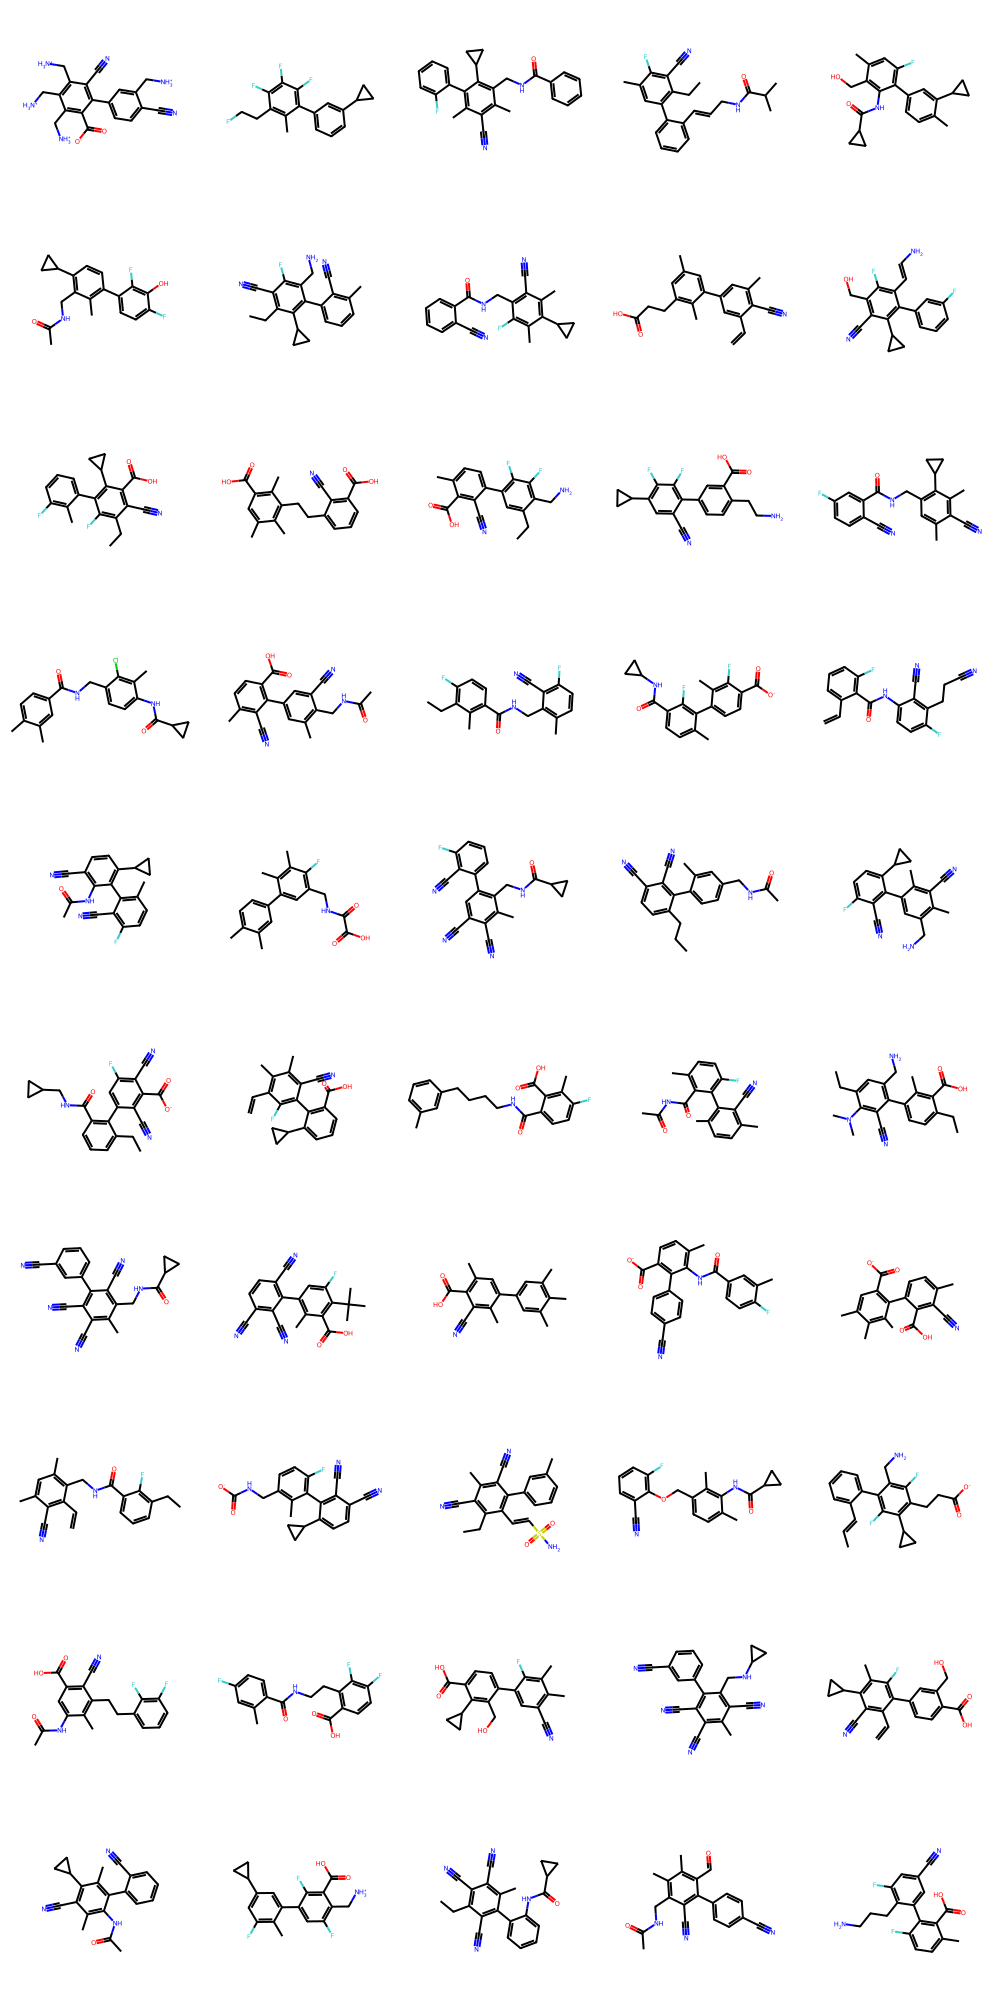

In [16]:


MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))